# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

## Introdução

Neste notebook, foi implementado um algoritmo de Aprendizado de Máquina Supervisionado, ou seja, um algoritmo que, recebendo um determinado conjunto ou uma determinada base de dados, o algoritmo é capaz de aprender as características de diferentes amostras, permitindo-o classificar amostras desconhecidas em dois grupos. Outrossim, as tarefas do algoritmo são as seguintes:

* Dado um conjunto, separar uma porcentagem das tarefas para treinamento do modelo
* Estando o modelo treinado, a porcentagem restante é utilizada para poder validar o funcionamento do modelo, verificando se a capacidade de separação das amostras é válida.
* Concluídas ambas estas etapas e validado o modelo, o mesmo estará pronto para receber amostras aleatórias daqueles dados, de modo a classificá-las com certa acurácia.

In [2]:
# Importando Módulos para Funcionamento
import matplotlib.pyplot as plt
from random import randint
from modules.functions import *


## Conjuntos de Teste 

Inicialmente, para teste de veracidade e funcinamento 

In [2]:
dot_list = []

seed(16)
for i in range(30):
    x = randint(0,200)
    y = noise(randint(0,200))
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

convexEnvelope = Graham(sorted_list)
for e in convexEnvelope:
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
ax.plot([x_envolt[len(x_envolt) - 1], x_envolt[0]], [y_envolt[len(y_envolt) - 1], y_envolt[0]], 'g-')
plt.show()

# Teste

Envoltoria 1

In [204]:


# Sorting endpoints
endpoitsList:Endpoint = []
segmentsList:Segment = []
for i in range(len(convexEnvelope) - 1):
    a = convexEnvelope[i]
    b = convexEnvelope[i + 1]

    left = a if a.x < b.x else b
    right = a if a.x >= b.x else b
    s = Endpoint(left, i, 'left')
    e = Endpoint(right, i, 'right')

    endpoitsList.append(s)
    endpoitsList.append(e)

    segmentsList.append(Segment(left, right, '1'))

lastIndx = len(convexEnvelope) - 1
last = convexEnvelope[lastIndx]
first = convexEnvelope[0]

left = last if last.x < first.x else first
right = last if last.x >= first.x else first
s =  Endpoint(left, lastIndx, 'left')
e =  Endpoint(right, lastIndx, 'right')
endpoitsList.append(s)
endpoitsList.append(e)

segmentsList.append(Segment(left, right, '1'))


endpoitsList.sort()
# endpoitsList
# segmentsList

False


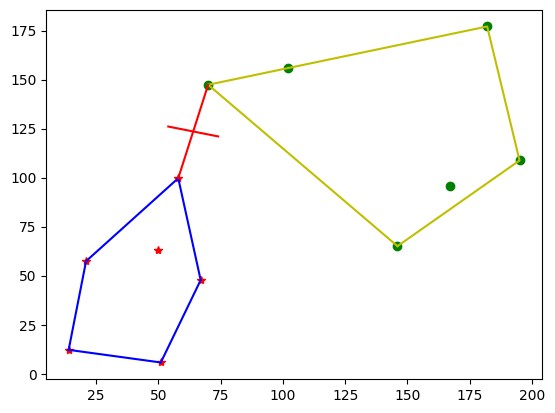

In [5]:
nPoints = 6
randomSeedA = randint(0, 1000)
randomSeedB = randint(0, 1000)
(pontosA, EnvoltoriaA) = EnvoltoriaAleatoria(seedParam=randomSeedA, numDots=nPoints)
(pontosB, EnvoltoriaB) = EnvoltoriaAleatoria(randomSeedB, nPoints, 60, 200, 60, 200)

fig, ax = plt.subplots()

plotEnvoltoria(ax, pontosA, EnvoltoriaA)
plotEnvoltoria(ax, pontosB, EnvoltoriaB, dotType='go', envType='y-')

endPointList, segmentsList = preProcessConvexHull(EnvoltoriaA= EnvoltoriaA, EnvoltoriaB= EnvoltoriaB)

if(not sweepLineIntersection(endPointList, segmentsList)):
    modLines = ourModel(EnvoltoriaA, EnvoltoriaB)
    a, b = modLines[1]
    ax.plot([a.x, b.x], [a.y, b.y], 'r-')
    
    c, d = modLines[0]
    ax.plot([c.x, d.x], [c.y, d.y], 'r-')

    print(modLines[2])

plt.show()


In [ ]:
# %pip install pandas

In [83]:
# %pip install sklearn

In [79]:
import pandas as pd
def plotClass(List, ax, dotType='r*', envType='b-', compareCol1=1, compareCol2=2, withNoise=True):
    # Recebe uma tabela com duas colunas referentes ao x e y da classe

    x = []
    y  = []
    dot_list = []
    for row in List.itertuples():
        a = noise(row[compareCol1]) if withNoise else row[compareCol1]
        b = noise(row[compareCol2]) if withNoise else row[compareCol2]
        dot = Dot(a, b)
        x.append(a)
        y.append(b)
        dot_list.append(dot)

    sorted_list = sortDotsByPolarAngle(dot_list)
    env = Graham(sorted_list)
    plotEnvoltoria(ax, dot_list, env, dotType=dotType, envType=envType)

In [ ]:
def plotModel(X, y, ax, filter, dotType='r*', envType='b-', compareCol1=1, compareCol2=2, withNoise=True):
    # Recebe uma tabela com duas colunas referentes ao x e y da classe

    x = []
    y  = []
    dot_list = []
    envoltorias = []

    setDots = [X[filter], X[not filter]]

    for points in setDots:
        for row in points.itertuples():
            a = noise(row[compareCol1]) if withNoise else row[compareCol1]
            b = noise(row[compareCol2]) if withNoise else row[compareCol2]
            dot = Dot(a, b)
            x.append(a)
            y.append(b)
            dot_list.append(dot)

        sorted_list = sortDotsByPolarAngle(dot_list)
        env = Graham(sorted_list)
        envoltorias.append(env)
        plotEnvoltoria(ax, dot_list, env, dotType=dotType, envType=envType)

    return sweepLineIntersection(envoltorias[0], envoltorias[1])
    

In [85]:
from random import shuffle
from sklearn.model_selection import train_test_split


def test_train(df, label, atributeA, atributeB, column1, column2):
    df = df[df[label] == atributeA or df[label] == atributeB]
    
    y = df[label]
    X = df.drop(label, axis=1)

    return train_test_split(X, y, random_state=25, train_size=0.7, shuffle=True)

# Banana BD

In [74]:
import pandas as pd

banana = pd.read_csv('./data/banana.csv', delimiter=',')

aType = banana[banana['Class'] == 1]
bType = banana[banana['Class'] == -1]

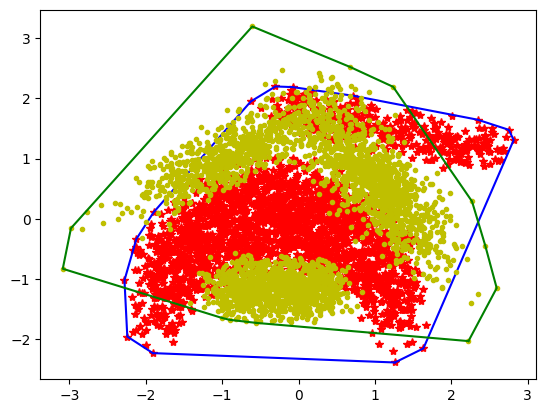

In [75]:
fig, ax = plt.subplots()
plotClass(aType, ax)
plotClass(bType, ax, dotType='y.', envType='g-')


# Iris BD

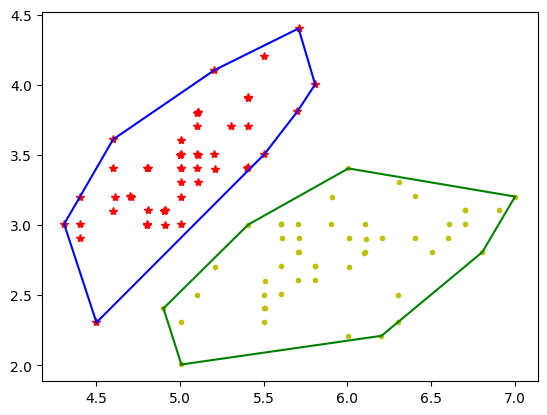

In [81]:
import pandas as pd

iris = pd.read_csv('./data/iris.csv', delimiter=',')

X_train, X_test, y_train, y_test = test_train(iris, 'Class', 'Iris-setosa', 'Iris-versicolor')

aType = iris[iris['Class'] == 'Iris-setosa']
bType = iris[iris['Class'] == 'Iris-versicolor']

fig, ax = plt.subplots()

plotClass(aType, ax)
plotClass(bType, ax, dotType='y.', envType='g-')

# wine quality

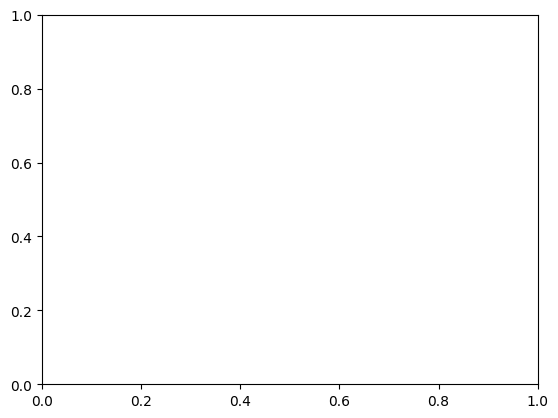

In [76]:
wine = pd.read_csv('./data/winequality-white.csv', delimiter=',')

aType = wine[wine['Quality'] == 4]
bType = wine[wine['Quality'] == 8]

fig, ax = plt.subplots()

col = (aType.shape)[1]
col2 = (bType.shape)[1]

# for i in range(col):
#     for j in range(col2):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         plt.show()

# Thyroid

In [ ]:
thyroid = pd.read_csv('./data/thyroid.csv', delimiter=',')

aType = thyroid[thyroid['Class'] == 3][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hipo
bType = thyroid[thyroid['Class'] == 2][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hyper
cType = thyroid[thyroid['Class'] == 1][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # normal

fig, ax = plt.subplots()

a = 1
b = 5
plotClass(bType, ax, dotType='yx', envType='g-', compareCol1=a, compareCol2=b, withNoise=False)
plotClass(cType, ax, dotType='r.', envType='b-', compareCol1=a, compareCol2=b, withNoise=False)




# Phoneme


In [ ]:
phoneme = pd.read_csv('./data/phoneme.csv', delimiter=',')

aType = phoneme[phoneme['Class'] == 0]
bType = phoneme[phoneme['Class'] == 1]

fig, ax = plt.subplots()

col = (aType.shape)[1]
col2 = (bType.shape)[1]

for i in range(col):
    for j in range(col2):

        fig, ax = plt.subplots()
        plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
        plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)


# Breast Cancer Wisconsin

In [ ]:
import numpy as np

cancer = pd.read_csv('./data/wdbc.csv', delimiter=',')

aType = cancer[cancer['Class'] == 'M']
bType = cancer[cancer['Class'] == 'B']

col = (aType.shape)[1]

# for i in range(col):
#     for j in range(col):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)

# plt.show()

# Ionosphere

In [ ]:
ionosphere = pd.read_csv('./data/ionosphere.csv', delimiter=',')

aType = ionosphere[ionosphere['Class'] == 'b']
bType = ionosphere[ionosphere['Class'] == 'g']


# fig, ax = plt.subplots()
# a = 24
# b = 15

# plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=a, compareCol2=b)
# plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=a, compareCol2=b)

# plt.show()

aType[['Pulse24', 'Pulse27']]

Coil2000

In [ ]:
coil2000 = pd.read_csv('./data/coil2000.csv', delimiter=',')

aType = coil2000[coil2000['CARAVAN'] == 0]
bType = coil2000[coil2000['CARAVAN'] == 1]


fig, ax = plt.subplots()

# col = (aType.shape)[1]

# for i in range(col):
#     for j in range(col):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         plt.show()


movement_libras

In [72]:
movement_libras = pd.read_csv('./data/movement_libras.csv', delimiter=',')

aType = movement_libras[movement_libras['Class'] == 1]
bType = movement_libras[movement_libras['Class'] == 12]

# fig, ax = plt.subplots()

# col = (aType.shape)[1]
# col = (bType.shape)[1]

# for i in range(col):
#     for j in range(col2):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         print(i, j)
#         plt.show()

0.79691
0.67892
0.72147
0.5648
0.67118
0.83366
0.71567
0.77563
0.77756
0.74468
0.78917
0.83752
0.29014
0.2089
0.19923
0.21857
0.24565
0.25145
0.69246
0.57447
0.4971
0.62282
0.58801
0.61896
